In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
np.random.seed(2)
bs = 64 # batch size

In [0]:
train_data = r"https://s3.amazonaws.com/fast-ai-imageclas/CUB_200_2011"

In [5]:
path = untar_data(train_data); path

PosixPath('/root/.fastai/data/CUB_200_2011')

In [0]:
path_img = path/'images'
data = ImageDataBunch.from_folder(path_img, valid_pct=0.2,
    ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

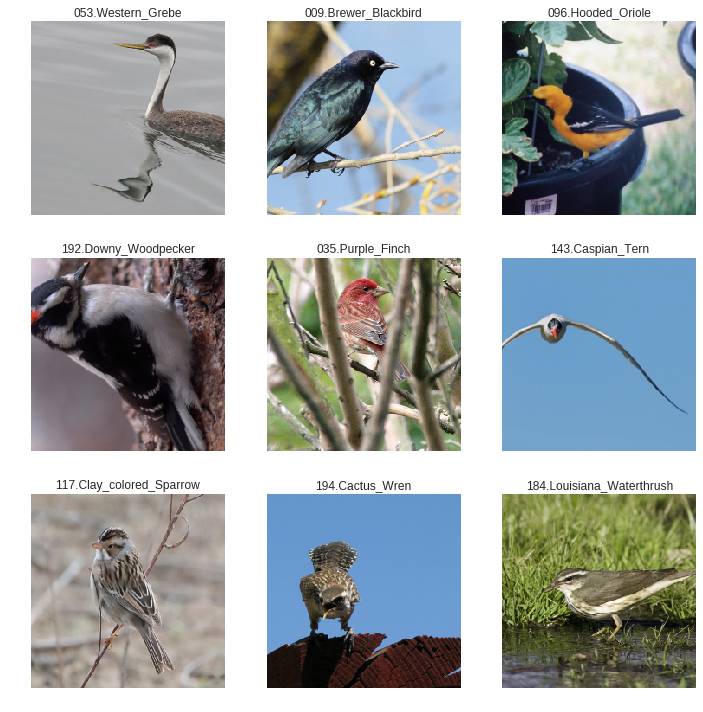

In [7]:
data.show_batch(rows=3, figsize=(10,10))

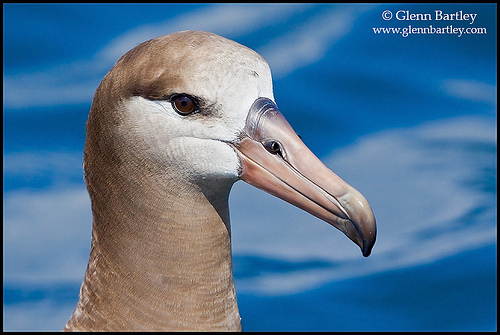

In [9]:
from IPython.display import Image
Image(filename='/root/.fastai/data/CUB_200_2011/images/001.Black_footed_Albatross/Black_Footed_Albatross_0046_18.jpg') 

In [10]:
data.classes[:5]

['001.Black_footed_Albatross',
 '002.Laysan_Albatross',
 '003.Sooty_Albatross',
 '004.Groove_billed_Ani',
 '005.Crested_Auklet']

In [8]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 90025548.57it/s]


In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,3.950039,2.335401,0.556640,03:10
2,2.043431,1.280200,0.355112,03:08
3,1.363041,1.044187,0.291896,03:11
4,1.125166,1.000050,0.273653,03:11


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

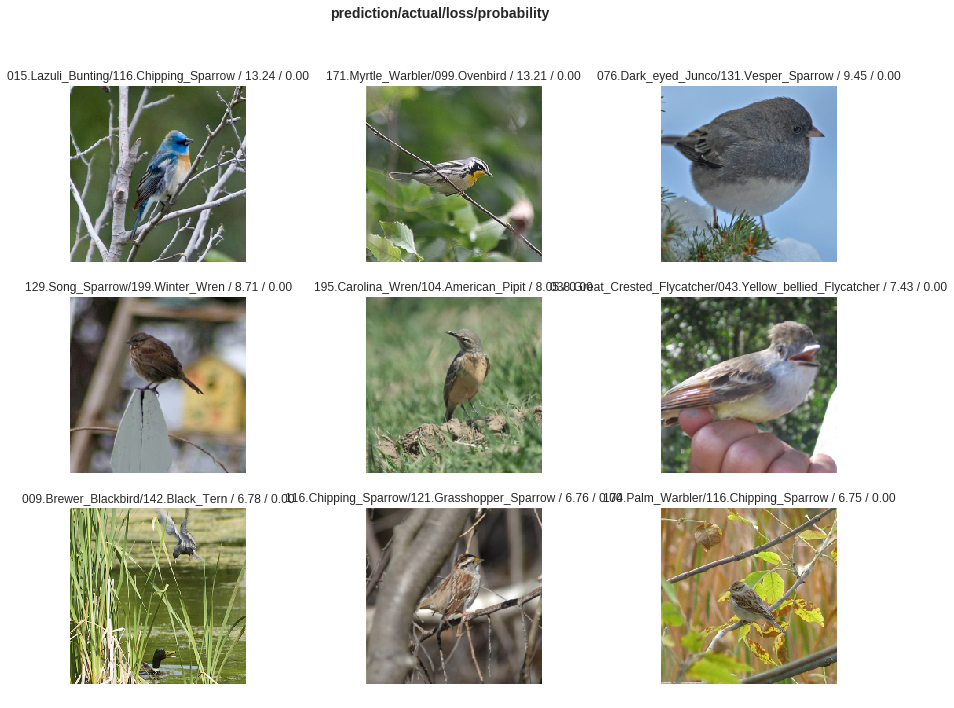

In [12]:
interp.top_losses()
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

In [0]:
#interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
interp.most_confused(min_val=2)

[('030.Fish_Crow', '029.American_Crow', 5),
 ('143.Caspian_Tern', '145.Elegant_Tern', 5),
 ('146.Forsters_Tern', '144.Common_Tern', 5),
 ('183.Northern_Waterthrush', '184.Louisiana_Waterthrush', 5),
 ('009.Brewer_Blackbird', '027.Shiny_Cowbird', 4),
 ('025.Pelagic_Cormorant', '023.Brandt_Cormorant', 4),
 ('068.Ruby_throated_Hummingbird', '069.Rufous_Hummingbird', 4),
 ('112.Great_Grey_Shrike', '111.Loggerhead_Shrike', 4),
 ('135.Bank_Swallow', '103.Sayornis', 4),
 ('139.Scarlet_Tanager', '140.Summer_Tanager', 4),
 ('144.Common_Tern', '141.Artic_Tern', 4),
 ('022.Chuck_will_Widow', '105.Whip_poor_Will', 3),
 ('031.Black_billed_Cuckoo', '033.Yellow_billed_Cuckoo', 3),
 ('037.Acadian_Flycatcher', '039.Least_Flycatcher', 3),
 ('051.Horned_Grebe', '050.Eared_Grebe', 3),
 ('054.Blue_Grosbeak', '014.Indigo_Bunting', 3),
 ('059.California_Gull', '066.Western_Gull', 3),
 ('065.Slaty_backed_Gull', '066.Western_Gull', 3),
 ('071.Long_tailed_Jaeger', '072.Pomarine_Jaeger', 3),
 ('102.Western_Wood_

In [0]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


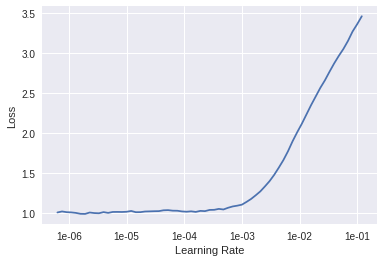

In [16]:
learn.recorder.plot()

In [17]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,1.042035,0.962738,0.272804,03:19
2,0.966593,0.944145,0.265168,03:21


In [18]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.937296,0.925765,0.259228,03:20
2,0.916391,0.893740,0.247773,03:21
3,0.851093,0.874919,0.245227,03:20
4,0.805330,0.860590,0.237166,03:18
5,0.769545,0.860510,0.238014,03:19


In [9]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
102502400it [00:01, 87589213.99it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


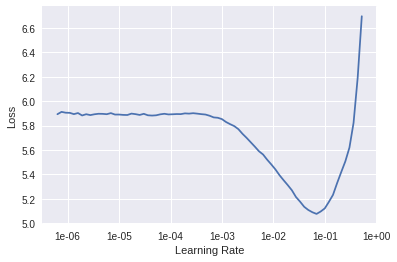

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
1,3.985843,2.626680,0.567671,03:24
2,2.094234,1.404796,0.391175,03:18
3,1.464150,1.124379,0.313534,03:15
4,1.092345,0.973844,0.280441,03:17
5,0.882122,0.942680,0.267713,03:16
6,0.715251,0.867224,0.248621,03:18
7,0.575330,0.836838,0.246924,03:19
8,0.501756,0.828570,0.243954,03:18


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


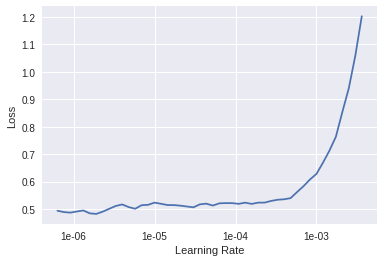

In [12]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [13]:
learn.fit_one_cycle(8, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
1,0.511408,0.822744,0.244378,03:46
2,0.478083,0.798094,0.235469,03:47
3,0.463551,0.786358,0.224862,03:46
4,0.433517,0.776591,0.226983,03:47
5,0.377423,0.763154,0.226135,03:47
6,0.371859,0.758195,0.222317,03:47
7,0.330372,0.754267,0.217650,03:46
8,0.327717,0.753604,0.219347,03:48
